In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
data=pd.read_csv("employee.csv")

In [242]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# . Reset the index as "name"

In [243]:
data = data.set_index("name")
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Select rows for specific names Jack Morgan and Josh wills.

In [244]:

data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [245]:


data[data['department'].isin(['Sales', 'Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [246]:
data.loc[data['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score


In [247]:
data.loc[(data["performance_score"]>500) & (data["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [249]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [250]:
data.isna().sum()


age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [251]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [211]:
for i in ['age', 'income']:
    data[i]=data[i].fillna(data[i].median())
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [212]:
data.isna().sum()


age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [213]:
data["gender"]=data["gender"].fillna(data["gender"].mode()[0])

In [214]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [215]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of performance_score')

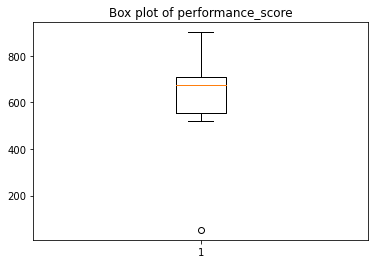

In [216]:
plt.boxplot(data["performance_score"])
plt.title("Box plot of performance_score")

In [217]:
Q1= np.percentile(data["performance_score"],25,interpolation="midpoint")
Q2= np.percentile(data["performance_score"],50,interpolation="midpoint")
Q3= np.percentile(data["performance_score"],75,interpolation="midpoint")
print("Q1:",Q1,"\n")
print("Q2:",Q2,"\n")
print("Q3:",Q3,"\n")

Q1: 556.0 

Q2: 674.0 

Q3: 711.0 



In [218]:
IQR=Q3-Q1
print("IQR:",IQR,"\n")

IQR: 155.0 



In [219]:
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print("low_limit:",low_limit,"\n")
print("upper_limit:",upper_limit,"\n")

low_limit: 323.5 

upper_limit: 943.5 



In [220]:
outlier=[]
for x in data["performance_score"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
print('outlier values are: ',outlier)

outlier values are:  [53]


In [221]:
ind1=data["performance_score"]<low_limit
ind1

name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

In [222]:
data.loc[ind1]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [223]:
data.drop(['James Authur'], inplace=True)

In [224]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [261]:
data["gender"].nunique()


2

In [268]:

data_dummy = pd.get_dummies(data['gender'])
data_dummy

,F,M
name,,
Allen Smith,0,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,0
James Authur,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10. Do the standard scaling on the feature performance score.

In [229]:
data['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [230]:
arr=np.array(data['performance_score']).reshape(-1, 1)
arr

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [901],
       [709]], dtype=int64)

In [272]:
scaler=preprocessing.StandardScaler()
scaled_performance_score=pd.DataFrame(scaler.fit_transform(arr),
                                      columns=['performance_score'])
scaled_performance_score

,performance_score
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425
